# Project 2 -  Modelling with ordinary differential equations

## By Mattis Sørensen, Tore Nygård and Mai-Helen Braathen

### Abstract:

### Introduction:



### Part 1

#### Execise 1.1 :

#### The purpose of trying to model the decline in population as −aN is because a is a positive constant related to the decline in population. The model assumes that as the population size increases, the growth rate decreases, and as the population size decreases, the growth rate increases. The purpose of modeling the decline in population as -a is to create a more realistic representation of population dynamics. The incorporation of the decline in population as -a in the model allows it to capture the idea that population growth is not unlimited but depends on the population's size relative to its carrying capacity.

#### Exercise 1.2 :

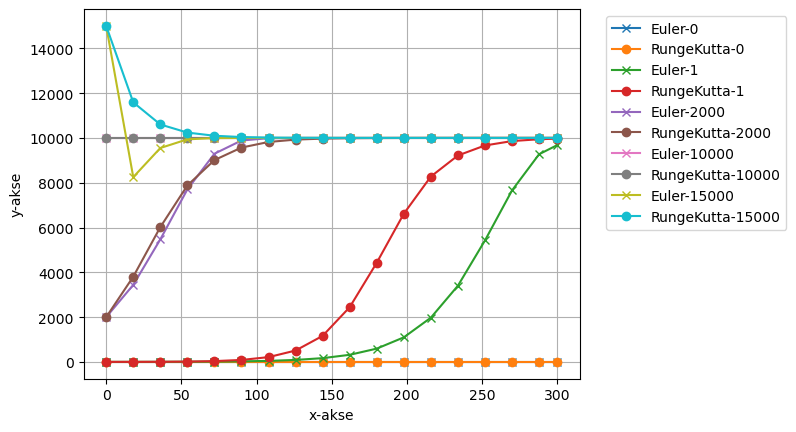

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import math


def main():
    x=0.0  # Start of integration
    xStop=25*12  # End of integration
    y=np.array([0])  #Initial conditions
    y1 = np.array([1])
    y2 = np.array([2000])
    y3 = np.array([10000])
    y4 = np.array([15000])
    h1=18  # Step size
    # h2=12
    # h3 = 6
    # h4 = 1
    X1,Y1=integrate_euler(F,x,y,xStop,h1)
    X2,Y2=integrate_rungk4(F,x,y,xStop,h1)
    X3,Y3=integrate_euler(F,x,y1,xStop,h1)
    X4,Y4=integrate_rungk4(F,x,y1,xStop,h1)
    X5,Y5=integrate_euler(F,x,y2,xStop,h1)
    X6,Y6=integrate_rungk4(F,x,y2,xStop,h1)
    X7,Y7=integrate_euler(F,x,y3,xStop,h1)
    X8,Y8=integrate_rungk4(F,x,y3,xStop,h1)
    X9,Y9=integrate_euler(F,x,y4,xStop,h1)
    X10,Y10=integrate_rungk4(F,x,y4,xStop,h1)
    #YEx = 100*X2-5*X2*X2+990*(np.exp(-0.1*X2)-1)
    
    

    #Exact solution
    timestep = 1 #Use month as timeunit

    starttime = 0
    endtime = 12*25 #Number of months that shall be simulated

    k = 10000 #kg
    r = 0.6/12 #Per month

    N0 = 20000 #inital biomass in kg

    T1 = []
    YExact = []

    t =starttime
    y = N0

    YExact.append(y)
    T1.append(t)

    while (t<endtime):
        t = t+timestep
        
        y=N0*k/(N0+(k-N0)*math.exp(-r*t)) #exact solution
        T1.append(t)
        YExact.append(y)
        
    #plt.plot(T1,YExact)
    plt.plot(X1,Y1[:,0],'-x',X2,Y2[:,0],'o-') #Euler and RungeKutta
    plt.plot(X3,Y3[:,0],'-x',X4,Y4[:,0],'o-') 
    plt.plot(X5,Y5[:,0],'-x',X6,Y6[:,0],'o-') 
    plt.plot(X7,Y7[:,0],'-x',X8,Y8[:,0],'o-') 
    plt.plot(X9,Y9[:,0],'-x',X10,Y10[:,0],'o-')
    plt.legend(['Euler-0','RungeKutta-0', 'Euler-1','RungeKutta-1', 'Euler-2000','RungeKutta-2000', 'Euler-10000','RungeKutta-10000','Euler-15000','RungeKutta-15000'],bbox_to_anchor=(1.04, 1))
    
    plt.grid(True)
    plt.xlabel('x-akse')
    plt.ylabel('y-akse')
    plt.show()
    
#Eulers method
def integrate_euler(F,x,y,xStop,h):
    X=[]
    Y=[]
    X.append(x)
    Y.append(y)
    
    while x<xStop:
        h=min(h,xStop-x)
        y=y+h*F(x,y)
        x=x+h
        X.append(x)
        Y.append(y)
    return np.array(X),np.array(Y)
#Rungekutta 4th order
def integrate_rungk4(F,x,y,xStop,h):
    X=[]
    Y=[]
    X.append(x)
    Y.append(y)
    
    while x<xStop:
        h=min(h,xStop-x)
        y=y + run_kut4(F,x,y,h)
        x=x+h
        X.append(x)
        Y.append(y)
    return np.array(X),np.array(Y)

#Rungekutta
def run_kut4(F,x,y,h):
  #  4th order Runge Kutta Method 
    K0=h*F(x,y)
    K1=h*F(x+0.5*h,y+0.5*K0)
    K2=h*F(x+0.5*h,y+0.5*K1)
    K3=h*F(x+h,y+K2)
    
    return (K0+2*K1+2*K2+K3)/6.0



def F(x,y):
    # User specified function that depends on the problem
    K = 10000
    r = 0.6/12
    F=np.zeros(1)
    F[0] = r*(1-y[0]/K)*y[0] 
    return F
    
main()    

## This is a comparison of the differences at a timestep of 18 months, between the exact solution, eulers method and rungkutta

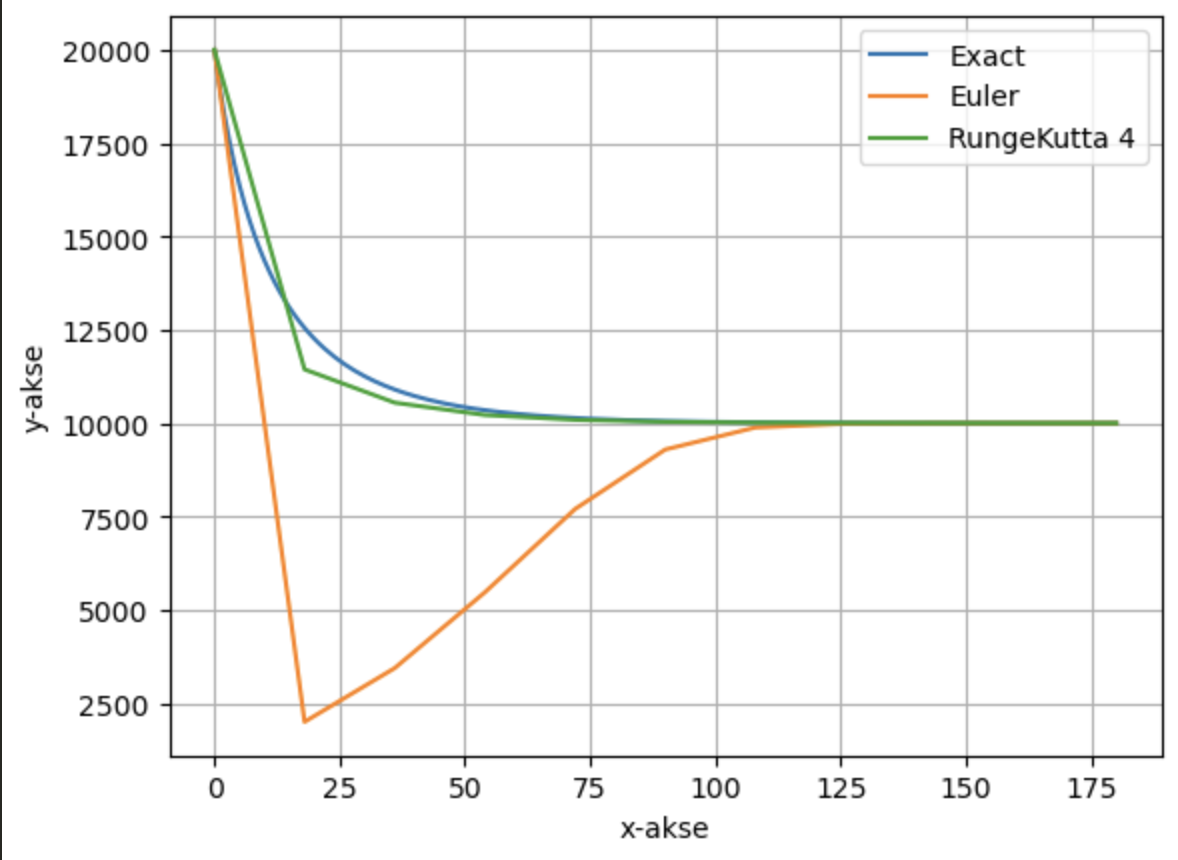!
## This is a comparison of every method with every timestep
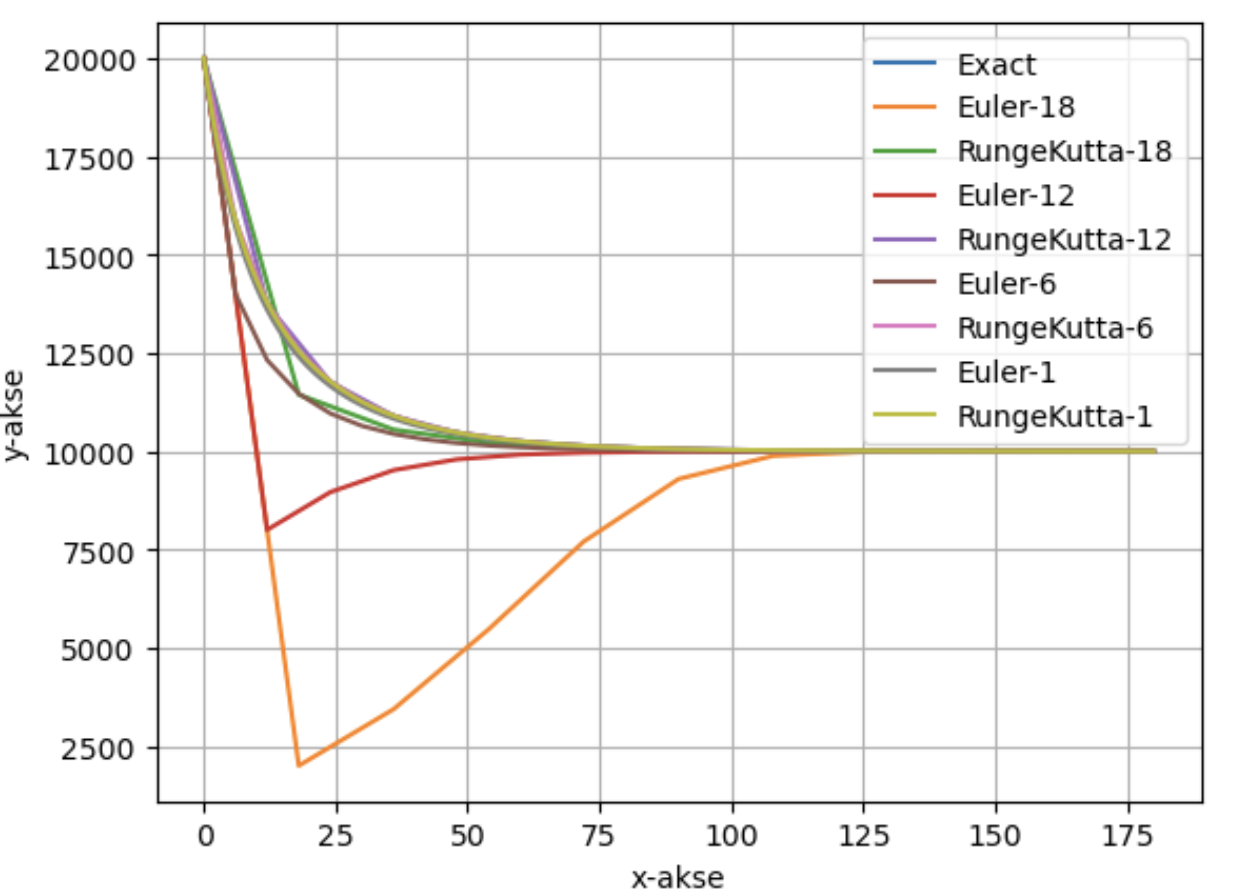
## This is a comparison of the different timesteps and how it influences euler
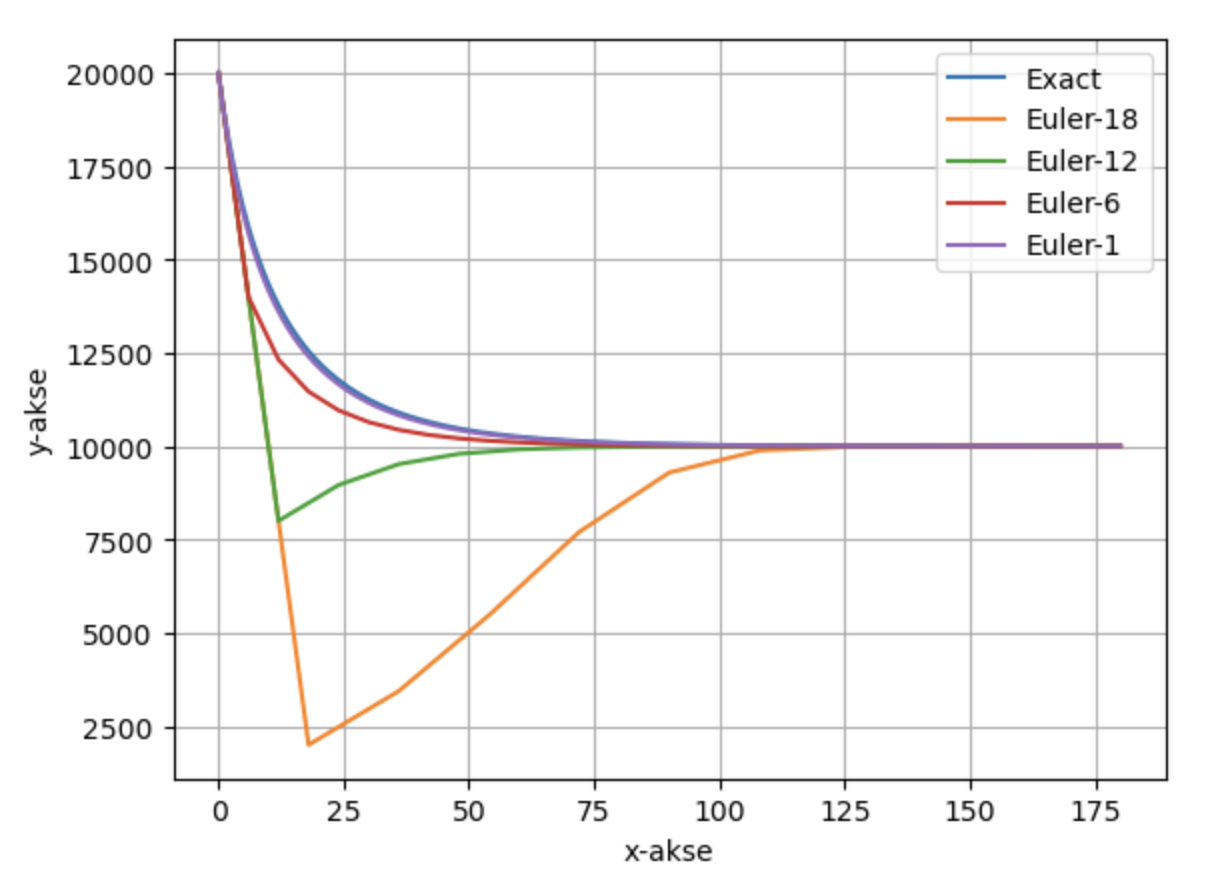
## This is a comparison of the different timesteps and how it influences RungeKutta 
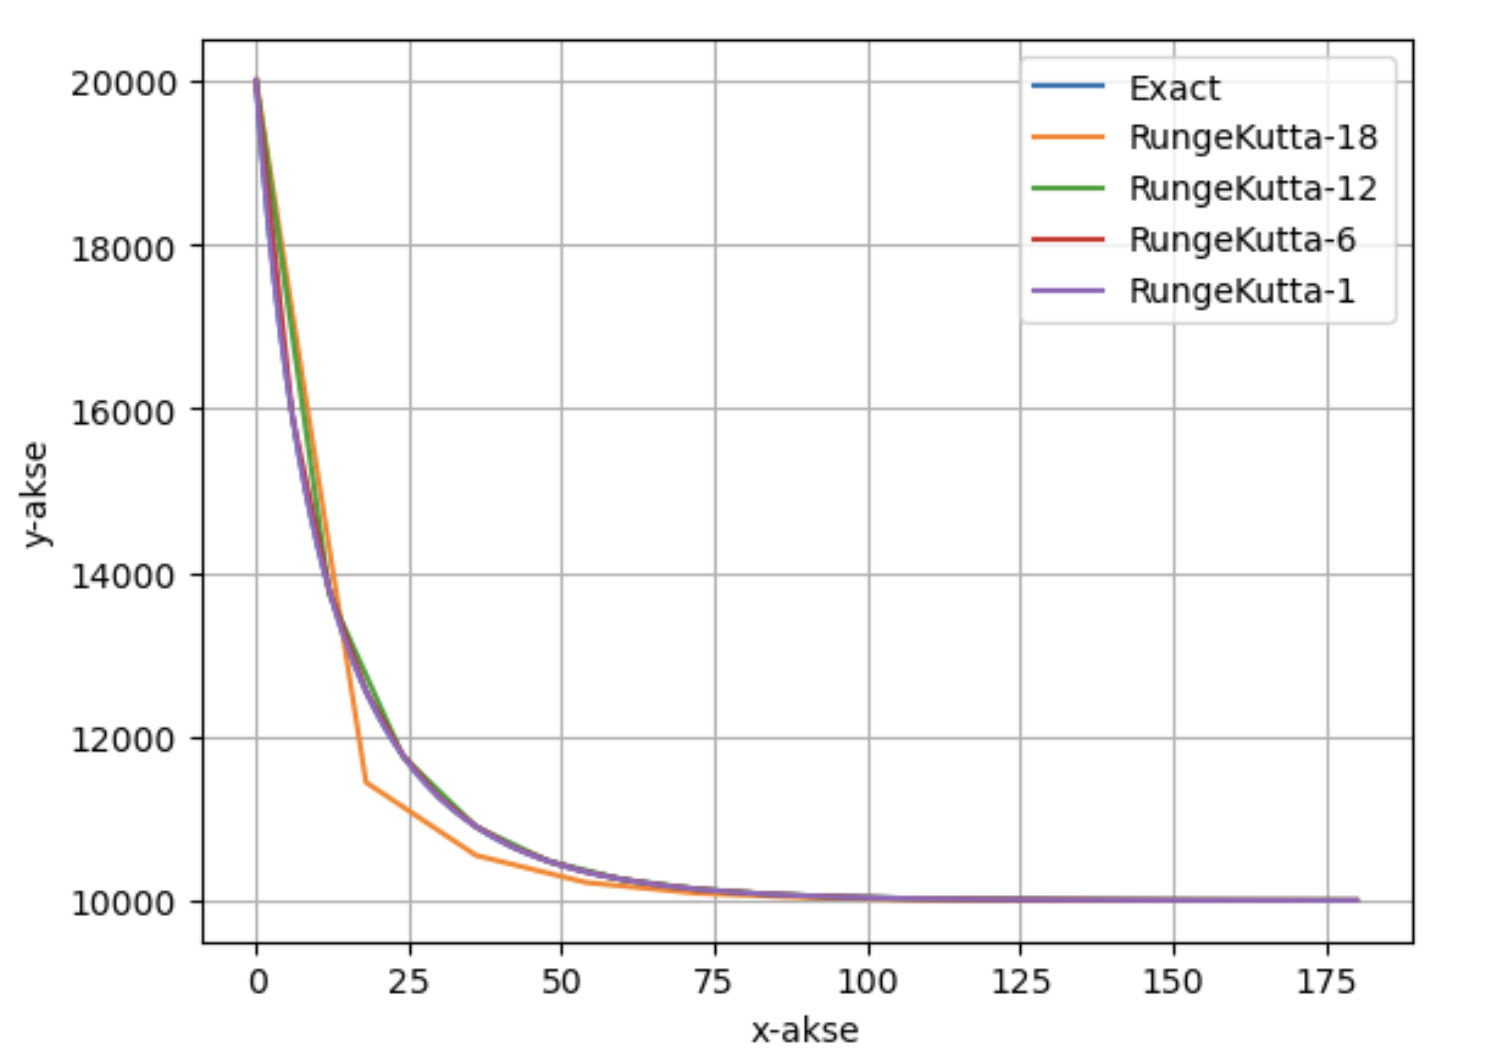

### We can observe that the 4th order Runge Kutta method approaches the exact solution much faster than the Euler method. We observe that a timestep of 12 is close to sufficient for Runge Kutta, while for Euler we have to approach a timestep close to 1, for similar results.

## Excercise 1.3

### Graph showing the comparisons of different initual values and methods
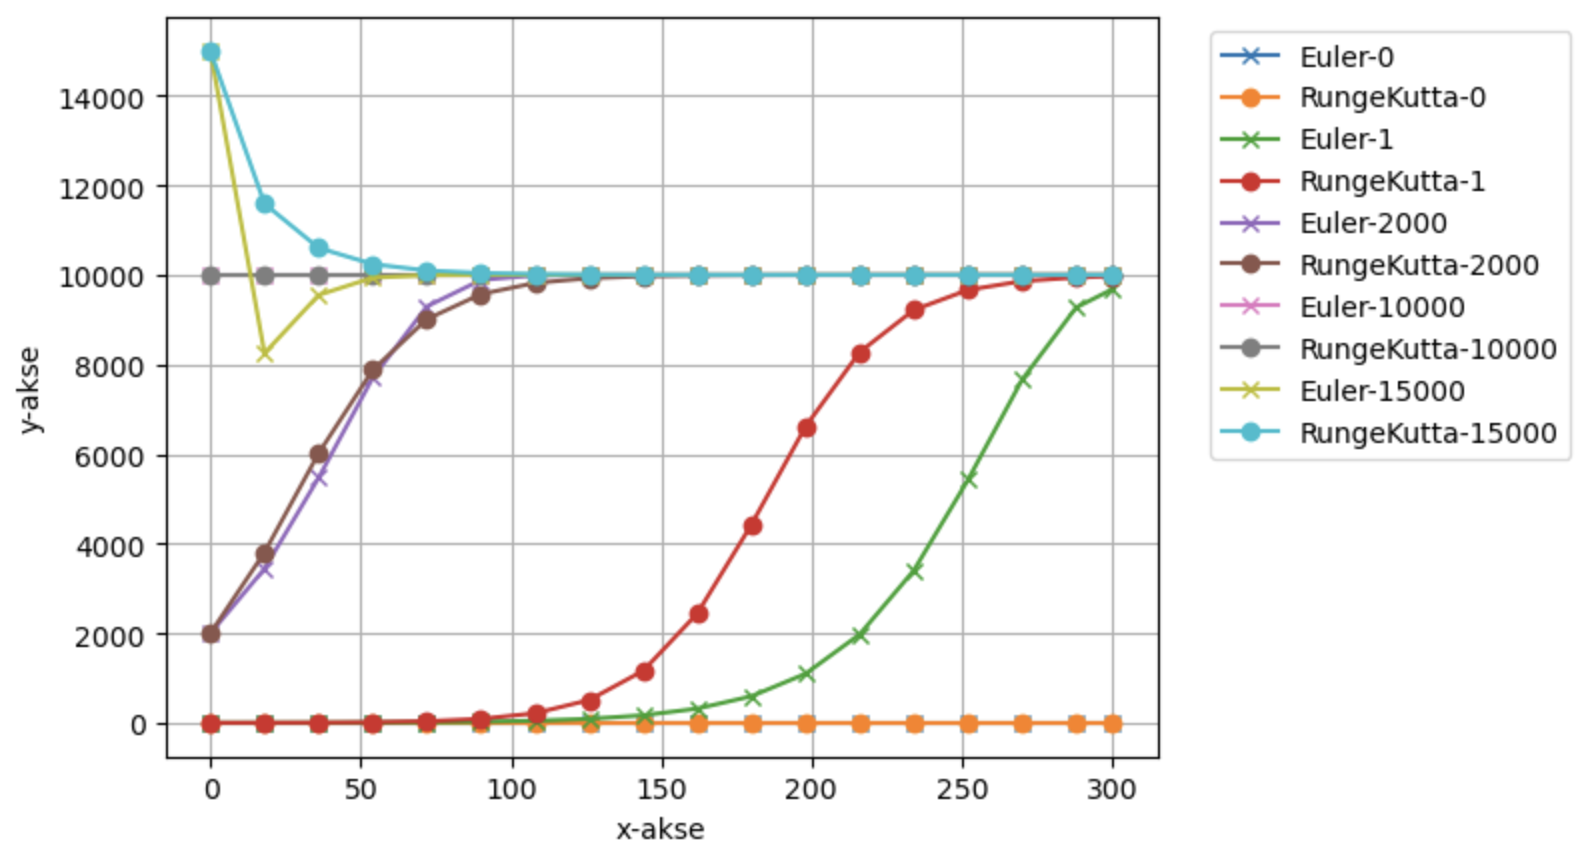

### From the graph we can observe that populations with an initial value of 0kg never starts growing, this makes sense as a biomass of 0 means it doesnt exist. From the graph we can see that an initial biomass of 1kg grows faster using the rungekutta method, versus what we observe in the euler method. <span style="color:red">(Differences between Euler and Runge Kutta aside, this result is interesting because potentially starting a biomass with 1 fish for example would not grow in real life.)</span>

### We can also observe that Runge Kutta has a faster increase, aswell as decrease in growth, and that a starting biomass of 10000kg stays stable at exactly 10000kg

## Excercise 1.4

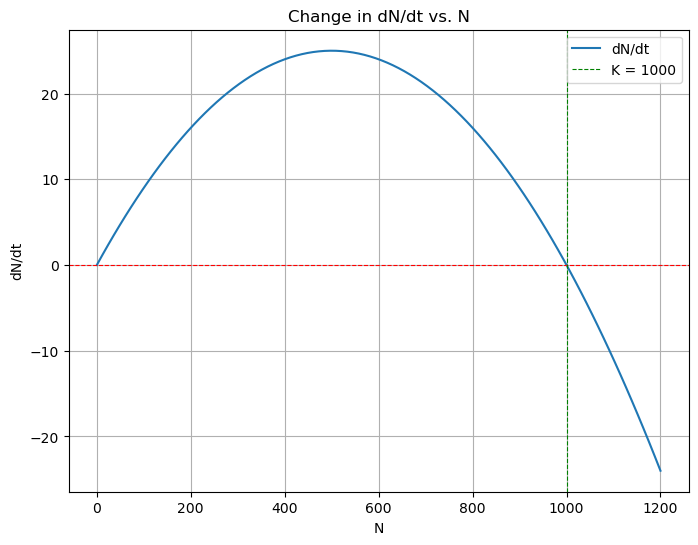

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
r = 0.1  # Growth rate
K = 1000  # Carrying capacity

# Values of N to study
N_values = np.linspace(0, 1200, 100)  

# Calculate dN/dt for each N value
dN_dt_values = r * N_values * (1 - N_values / K)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(N_values, dN_dt_values, label='dN/dt')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8)  # Add a horizontal line at y=0
plt.axvline(K, color='green', linestyle='--', linewidth=0.8, label=f'K = {K}')  # Vertical line at K
plt.title('Change in dN/dt vs. N')
plt.xlabel('N')
plt.ylabel('dN/dt')
plt.legend()
plt.grid(True)
plt.show()


### From the plot we can observe that the rate of change dN/dt is 0 when N = 0 and N = 1000. This is because there is no growth when the biomass is non-existent, and at N=1000 we have hit the maximum carrying capacity, where the amount of fish that die, cancel out the growth.

### It can also be observed that when N = K, where K is the carrying capacity, the rate of growth becomes negative by an increasing rate, meaning the further above max carrying capacity the current biomass is, the greater the rate of decline will be. This can also be observed by looking at Euler-15000 and RungeKutta-15000.

### <span style="color:red">Similarly we can observe that the rate of growth is the greatest N = K/2 or N = 500 in this case. By observing the plot from earlier we can observe the same scenario.</span>




## Excercise 1.5

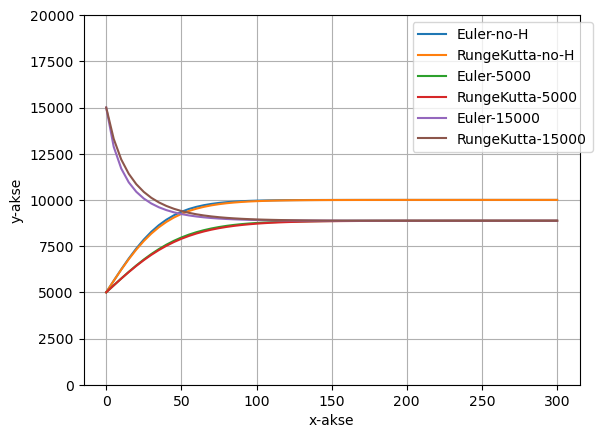

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import math


def main():
    x=0.0  # Start of integration
    xStop=25*12  # End of integration
    y=np.array([5000])  #Initial conditions
    y1 = np.array([15000])
    # y2 = np.array([2000])
    # y3 = np.array([10000])
    # y4 = np.array([15000])
    h1=5  # Step size
    # h2=12
    # h3 = 6
    # h4 = 1
    X1,Y1=integrate_euler(F,x,y,xStop,h1)
    X2,Y2=integrate_rungk4(F,x,y,xStop,h1)
    X3,Y3=integrate_euler(F2,x,y,xStop,h1)
    X4,Y4=integrate_rungk4(F2,x,y,xStop,h1)
    X5,Y5=integrate_euler(F2,x,y1,xStop,h1)
    X6,Y6=integrate_rungk4(F2,x,y1,xStop,h1)
    # X7,Y7=integrate_euler(F,x,y3,xStop,h1)
    # X8,Y8=integrate_rungk4(F,x,y3,xStop,h1)
    # X9,Y9=integrate_euler(F,x,y4,xStop,h1)
    # X10,Y10=integrate_rungk4(F,x,y4,xStop,h1)
    #YEx = 100*X2-5*X2*X2+990*(np.exp(-0.1*X2)-1)
    
    

    

  
        
    #plt.plot(T1,YExact)
    plt.plot(X1,Y1[:,0],'-',X2,Y2[:,0],'-') #Euler and RungeKutta
    plt.plot(X3,Y3[:,0],'-',X4,Y4[:,0],'-') 
    plt.plot(X5,Y5[:,0],'-',X6,Y6[:,0],'-') 
    # plt.plot(X7,Y7[:,0],'-x',X8,Y8[:,0],'o-') 
    # plt.plot(X9,Y9[:,0],'-x',X10,Y10[:,0],'o-')
    plt.legend(['Euler-no-H','RungeKutta-no-H','Euler-5000','RungeKutta-5000','Euler-15000','RungeKutta-15000'],bbox_to_anchor=(1.04, 1))
    plt.ylim(ymin=0,ymax= 20000)
    plt.grid(True)
    plt.xlabel('x-akse')
    plt.ylabel('y-akse')
    plt.show()
    
#Eulers method
def integrate_euler(F,x,y,xStop,h):
    X=[]
    Y=[]
    X.append(x)
    Y.append(y)
    
    while x<xStop:
        h=min(h,xStop-x)
        y=y+h*F(x,y)
        x=x+h
        X.append(x)
        Y.append(y)
    return np.array(X),np.array(Y)
#Rungekutta 4th order
def integrate_rungk4(F,x,y,xStop,h):
    X=[]
    Y=[]
    X.append(x)
    Y.append(y)
    
    while x<xStop:
        h=min(h,xStop-x)
        y=y + run_kut4(F,x,y,h)
       
        
        x=x+h
        X.append(x)
        Y.append(y)
    return np.array(X),np.array(Y)

#Rungekutta
def run_kut4(F,x,y,h):
  #  4th order Runge Kutta Method 
    K0=h*F(x,y)
    K1=h*F(x+0.5*h,y+0.5*K0)
    K2=h*F(x+0.5*h,y+0.5*K1)
    K3=h*F(x+h,y+K2)
    
    return (K0+2*K1+2*K2+K3)/6.0



def F2(x,y):
    # User specified function that depends on the problem
    K = 10000
    r = 0.6/12
    H = 50
    F=np.zeros(1)
    if y[0] < 0:
        y[0] = 0
    F[0] = (r*(1-y[0]/K)*y[0] ) - H
    return F
def F(x,y):
    # User specified function that depends on the problem
    K = 10000
    r = 0.6/12
    F=np.zeros(1)
    F[0] = r*(1-y[0]/K)*y[0] 
    return F
    
main()    

### H=50
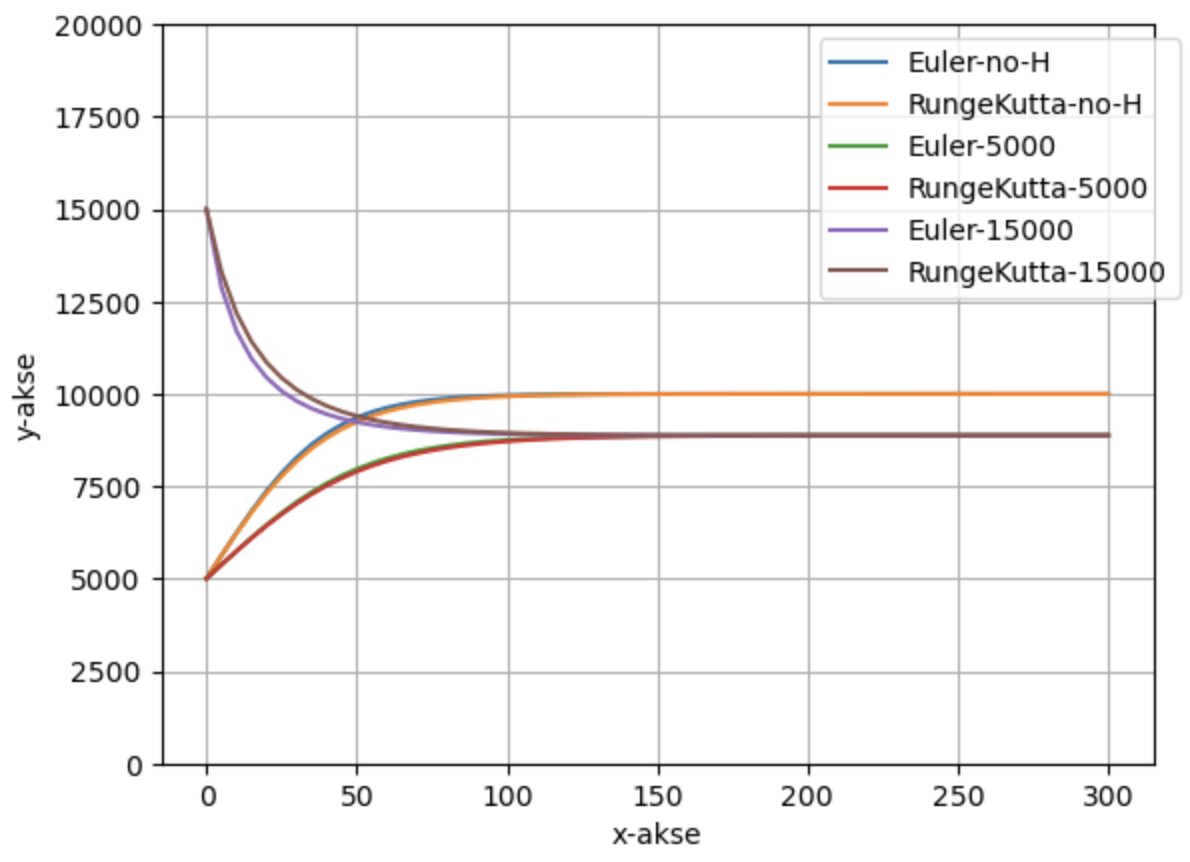
## H=100
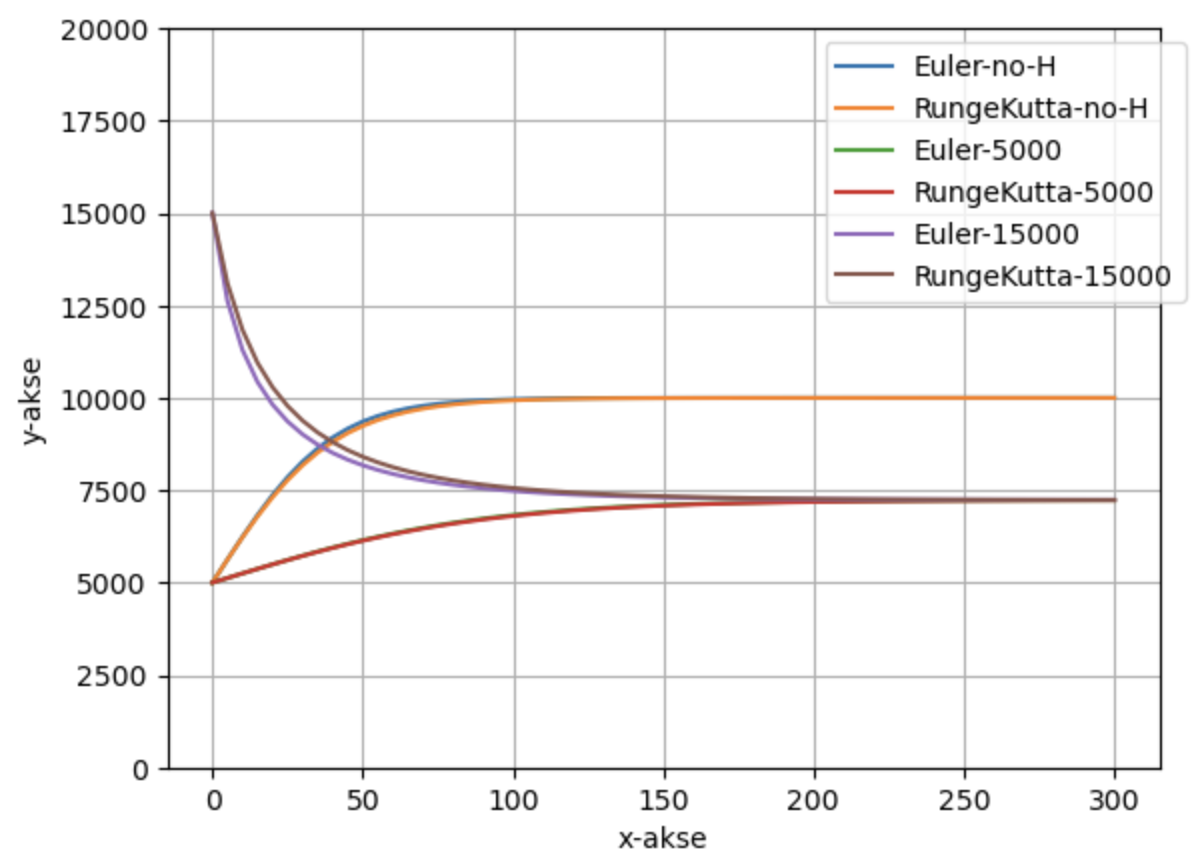
## H=120
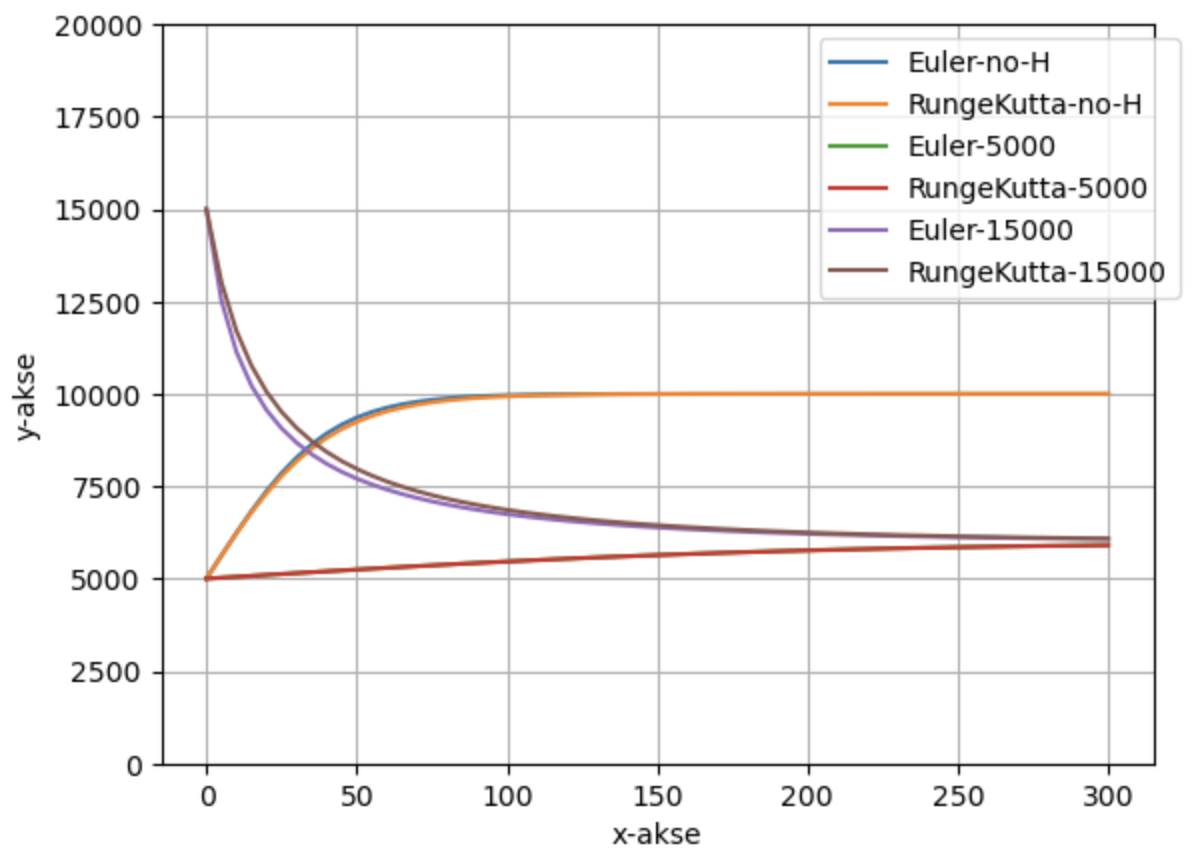
## H=150
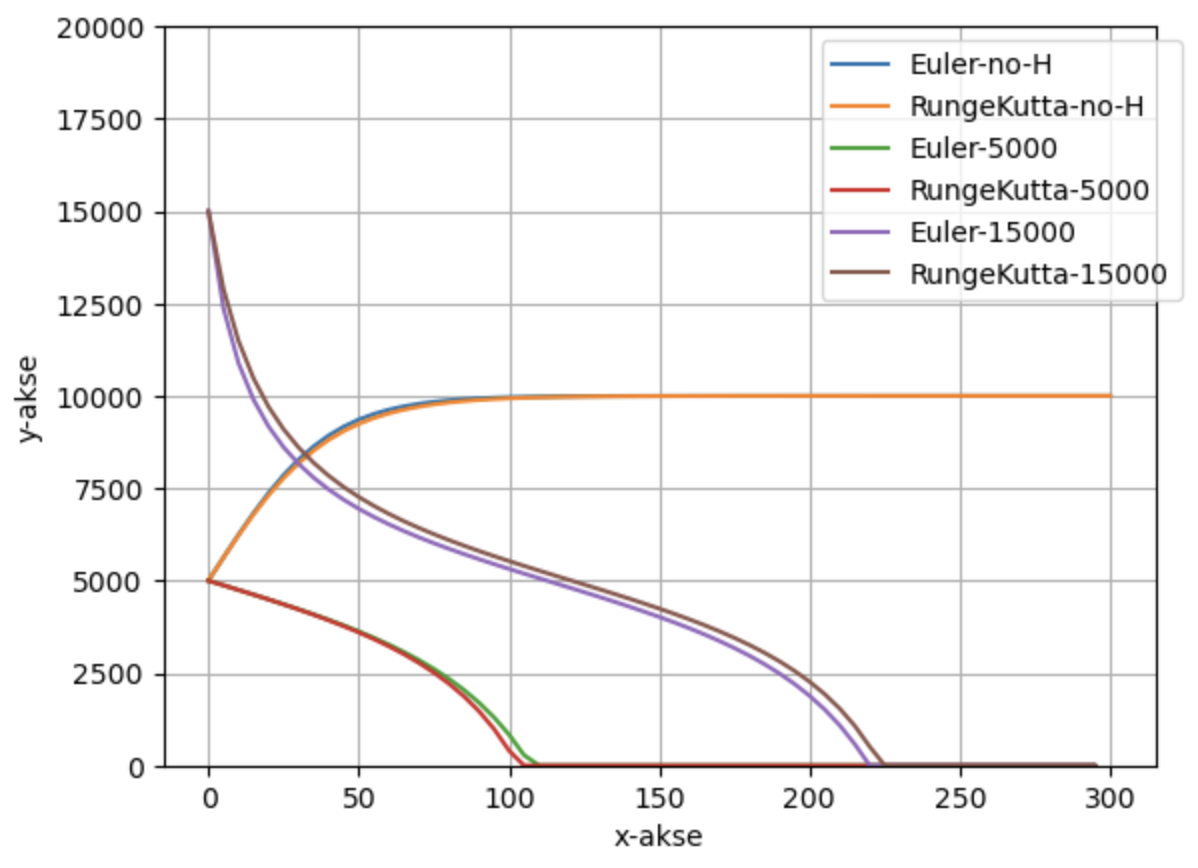

<span style="color:red">Present and discuss what you observe</span>

### Excercise 1.6

To find the critical limit, also known as the Maximum Sustainable Yield (MSY), where the population can be harvested without causing a collapse, you need to analyze the given logistic growth model:

$$
\frac{dN}{dt} = r \cdot N \cdot \left(1 - \frac{N}{K}\right)
$$

Where:
- $$dN/dt$$ is the rate of change of the population.
- $$r$$ is the growth rate.
- $$K$$ is the carrying capacity.

The MSY represents the maximum harvest rate, denoted as $$H$$, that can be sustained without causing the population ($$N$$) to collapse. To find this maximum, we need to set $$dN/dt\$$ to zero and solve for $$N$$. This occurs when the population growth ($$dN/dt$$) is in equilibrium with the harvest $$H$$).

Setting $$dN/dt$$ to zero:

$$
0 = r \cdot N \cdot \left(1 - \frac{N}{K}\right)
$$

Now, let's solve for $$N$$ to find the equilibrium population size:

$$
r \cdot N \cdot \left(1 - \frac{N}{K}\right) = 0
$$

This equation has two solutions:

1. $$N = 0\): This is the trivial solution, where the population is extinct.

2. $$\left(1 - \frac{N}{K}\right) = 0$$), which implies $$\frac{N}{K} = 1$$. Solving for $$N$$):

$$
N = K
$$

So, the equilibrium population size $$N$$ at MSY is equal to the carrying capacity $$K$$. At this population size, the population is stable, and you can harvest the maximum sustainable yield $$H$$.

Now, to calculate $$H$$, you can use the following formula:

$$
H = r \cdot N \cdot \left(1 - \frac{N}{K}\right)
$$

Substitute $$N = K$$ into the equation:

$$
H = r \cdot K \cdot \left(1 - \frac{K}{K}\right) = r \cdot K \cdot (1 - 1) = 0
$$

So, the maximum sustainable yield $$H$$ is indeed zero when $$N = K$$, which means you cannot harvest any more when the population reaches the carrying capacity $$K$$.

To find the critical limit where $$H$$ is not zero, you can investigate when $$N$$ is close to, but not equal to, $$K$$. You can use this relationship:

$$
\left(1 - \frac{N}{K}\right) \approx 1 - \frac{N}{K}
$$

Now, you can calculate $$H$$ when $$N$$ is close to $$K$$:

$$
H \approx r \cdot N \cdot \left(1 - \frac{N}{K}\right) \approx r \cdot N \cdot \left(1 - 1 + \frac{N}{K}\right) = r \cdot N \cdot \frac{N}{K}
$$

Simplifying further:

$$
H \approx \frac{r}{K} \cdot N^2
$$

Now, to find the critical limit where $$H$$ is a maximum, you can differentiate $$H$$ with respect to $$N$$ and set it equal to zero:

$$
\frac{dH}{dN} = 2 \cdot \frac{r}{K} \cdot N = 0
$$

Solving for $$N$$:

$$
N = 0
$$

So, the maximum sustainable yield (\(H\)) is maximized when \(N = 0\), which corresponds to the population being at its lowest level, right before it starts growing. 

The formula you provided, \(H = \frac{r}{K} \cdot N^2\), does not accurately represent the MSY. Instead, the MSY is achieved when the population is at its lowest point, and the harvest is zero at the carrying capacity (\(K\)).


<span style="color:red">GJERNE FIKS DETTE ELLER GJØR DET PÅ EN ANNEN MÅTE PLS</span>

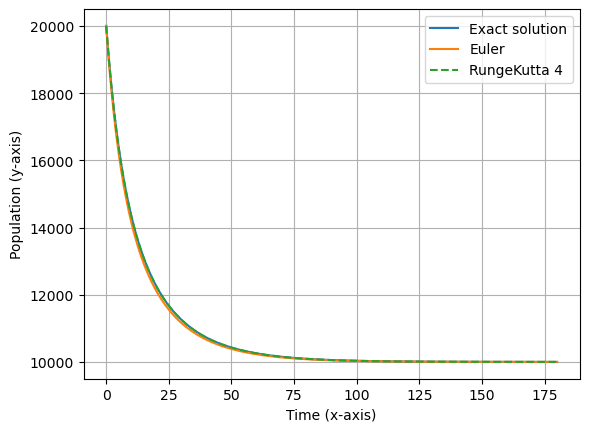

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def main():
    x = 0.0  # Start of integration
    xStop = 15*12 # End of integration
    y = np.array([20000])  # Initial conditions (population at t = 0)
    h1 = 1  # Step size for Euler's method
    h2 = 1 # Step size for Runge-Kutta 4th order method
    X1, Y1 = integrate_euler(logistic_growth, x, y, xStop, h1)
    X2, Y2 = integrate_rungk4(logistic_growth, x, y, xStop, h2)
    
    plt.plot(X1, Y1[:, 0], label='Euler')
    plt.plot(X2, Y2[:, 0], label='RungeKutta 4', linestyle='--')
    plt.grid(True)
    plt.xlabel('Time (x-axis)')
    plt.ylabel('Population (y-axis)')
    plt.legend()
    plt.show()


timestep = 1 #Use month as timeunit

starttime = 0
endtime = 12*15 #Number of months that shall be simulated

k = 10000 #kg
r = 0.6/12 #Per month

N0 = 20000 #inital biomass in kg

T1 = []
YExact = []

t =starttime
y = N0

YExact.append(y)
T1.append(t)

while (t<endtime):
    t = t+timestep
    
    y=N0*k/(N0+(k-N0)*math.exp(-r*t)) #exact solution
    T1.append(t)
    YExact.append(y)
    
plt.plot(T1,YExact, label='Exact solution')

def integrate_euler(F, x, y, xStop, h):
    X = []
    Y = []
    X.append(x)
    Y.append(y)
    
    while x < xStop:
        h = min(h, xStop - x)
        y = y + h * F(x, y)
        x = x + h
        X.append(x)
        Y.append(y)
    
    return np.array(X), np.array(Y)

def integrate_rungk4(F, x, y, xStop, h):
    X = []
    Y = []
    X.append(x)
    Y.append(y)
    
    while x < xStop:
        h = min(h, xStop - x)
        y = y + run_kut4(F, x, y, h)
        x = x + h
        X.append(x)
        Y.append(y)
    
    return np.array(X), np.array(Y)

def run_kut4(F, x, y, h):
    K0 = h * F(x, y)
    K1 = h * F(x + 0.5 * h, y + 0.5 * K0)
    K2 = h * F(x + 0.5 * h, y + 0.5 * K1)
    K3 = h * F(x + h, y + K2)
    
    return (K0 + 2 * K1 + 2 * K2 + K3) / 6.0

def logistic_growth(x, y):
    # Logistic growth differential equation
    r = 0.6/12  # Growth rate (adjust as needed)
    K = 10000  # Carrying capacity (adjust as needed)
    dydx = r * y * (1 - y / K)
    return dydx

main()


### Part 2 – Modelling and Control of the Water Level in a Tank